## Lesson 01 Assignment

Import required libraries:

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# Functions

# Display kernel density plot for the given column with options
def show_kde_plot(col_name, axis, bandwidth):
    sns.kdeplot(energy_loads.loc[:, col_name], ax = axis, bw = bandwidth)
    axis.set_title('KDE plot of ' + col_name) # Give the plot a main title
    axis.set_xlabel(col_name) # Set text for the x axis
    axis.set_ylabel('Density')# Set text for y axis

# Display distribution for the given categorical variable as a bar chart
def show_count_plot(data_set, col_name, axis):
    sns.countplot(x = col_name, data = data_set, ax = axis, color="#4080c0")
    axis.set_title('Number of Buildings by ' + col_name)
    axis.set_xlabel(col_name)
    axis.set_ylabel('Number of Buildings')

Download the energy efficiency data set:

In [12]:
# TODO: change to live url!
#url = 'https://raw.githubusercontent.com/StephenElston/DataScience410/master/Lecture1/EnergyEfficiencyData.csv'
url = 'EnergyEfficiencyData.csv'

# Download the data into a dataframe object
energy_loads = pd.read_csv(url)

Inspect initial rows of data set:

In [13]:
energy_loads.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Inspect final rows of data set:

In [8]:
energy_loads.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


### Glossary
 - cooling load - amount of heat energy required to remove from a space (cooling) to maintain the temperature in an acceptable range
 - glazing area - glass component of building's façade or internal surfaces
 - glazing area distribution - how glazing area is distributed within the whole building, 1:Uniform, 2:North, 3:East, 4:South, 5:West
 - heating load - amount of heat energy required to add to a space to maintain the temperature in an acceptable range
 - orientation - 2:North, 3:East, 4:South, 5:West
 - overall height - height of the building at its highest point
 - relative compactness - volume to surface ratio of structure compared to that of the most compact shape with the same volume, 1 = most compact
 - roof area - total area of roof
 - surface area - total area of all surfaces
 - wall area - total area of all walls

### Distributions

Explore the distributions of the variables via kernel density plots

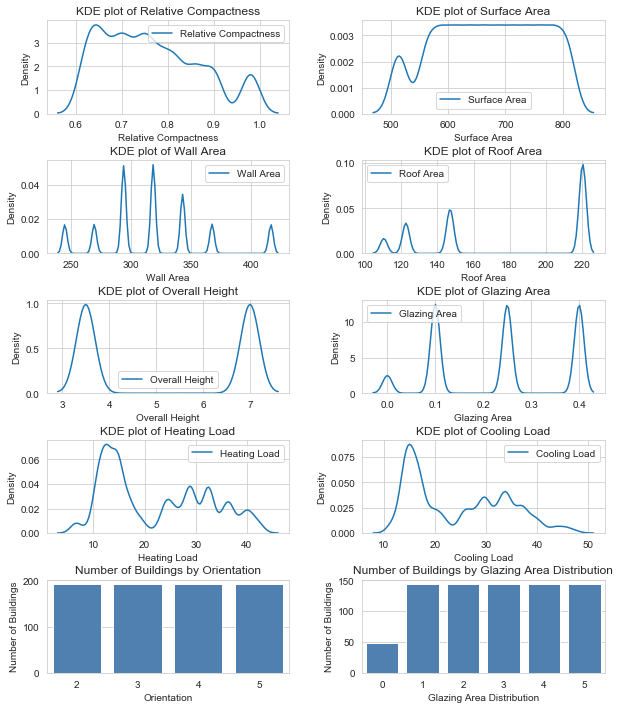

In [148]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), 
      (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
sns.set_style("whitegrid")
show_kde_plot('Relative Compactness', ax1, 0.02)
show_kde_plot('Surface Area', ax2, 15)
show_kde_plot('Wall Area', ax3, 2)
show_kde_plot('Roof Area', ax4, 2)
show_kde_plot('Overall Height', ax5, 0.2)
show_kde_plot('Glazing Area', ax6, 0.01)
show_kde_plot('Heating Load', ax7, 1)
show_kde_plot('Cooling Load', ax8, 1)
show_count_plot(energy_loads, 'Orientation', ax9)
show_count_plot(energy_loads, 'Glazing Area Distribution', ax10)

### Scatter Plots

Compare relative compactness to heating load:

Text(0, 0.5, 'Heating Load')

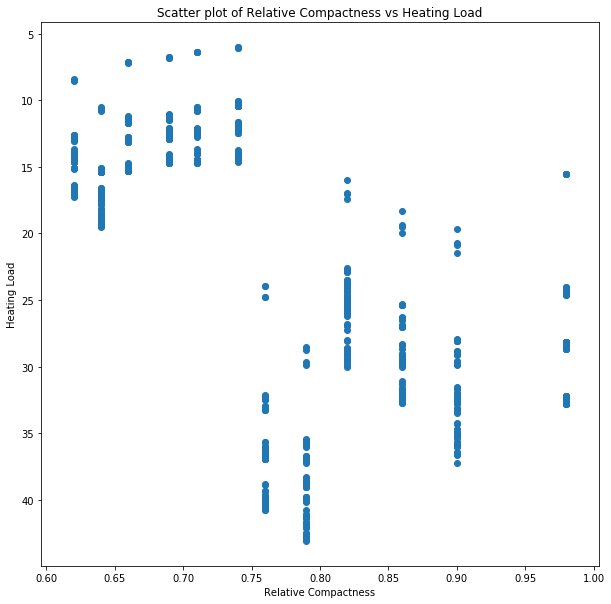

In [32]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Relative Compactness'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Relative Compactness vs Heating Load') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

Buildings that are not compact have lower heating loads. When 'Relative Compactness' goes above 0.75, there is a sudden increase in heating load, which decreases again above 0.80 energy efficiency, slowly increasing to 0.9, and again decreasing at maximum compactness.

Now compare relative compactness to cooling load:

Text(0, 0.5, 'Cooling Load')

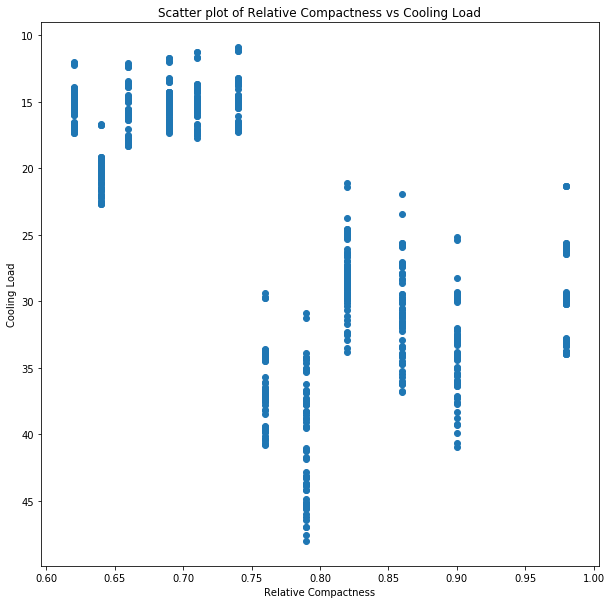

In [44]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Relative Compactness'], y = energy_loads['Cooling Load'])
ax.set_title('Scatter plot of Relative Compactness vs Cooling Load') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Cooling Load') # Set text for y axis

We find the same pattern as with heating load. Heating load and cooling load appear to proxy one another. Therefore, we shall consider heating load below.

Text(0, 0.5, 'Heating Load')

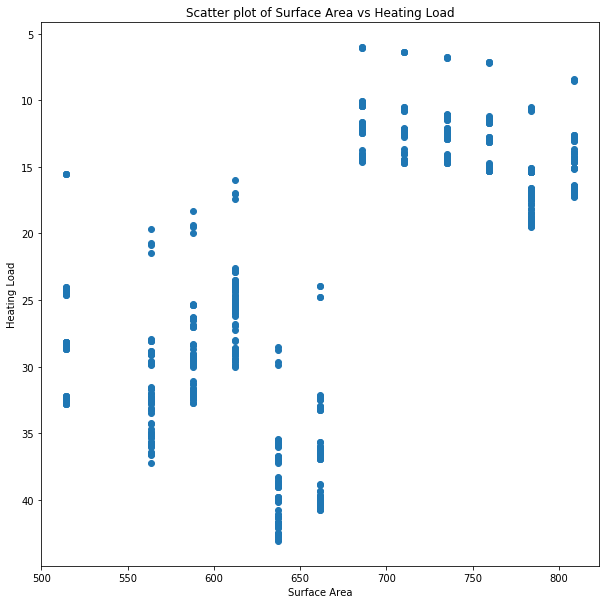

In [46]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Surface Area'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Surface Area vs Heating Load') # Give the plot a main title
ax.set_xlabel('Surface Area') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

Text(0, 0.5, 'Heating Load')

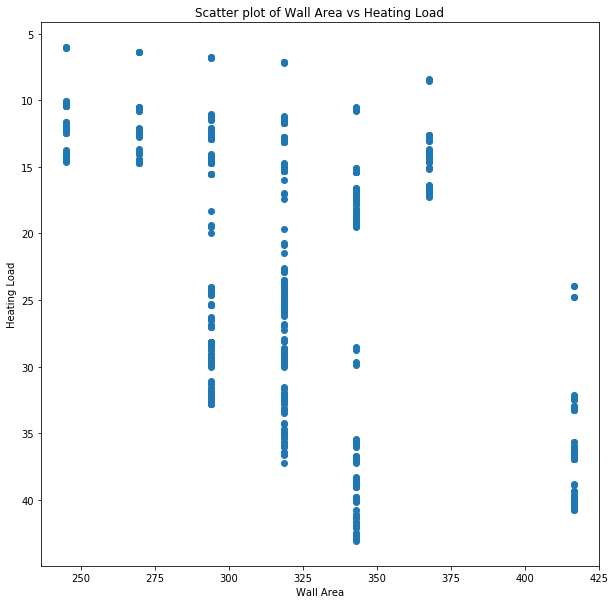

In [47]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Wall Area'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Wall Area vs Heating Load') # Give the plot a main title
ax.set_xlabel('Wall Area') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

Text(0, 0.5, 'Heating Load')

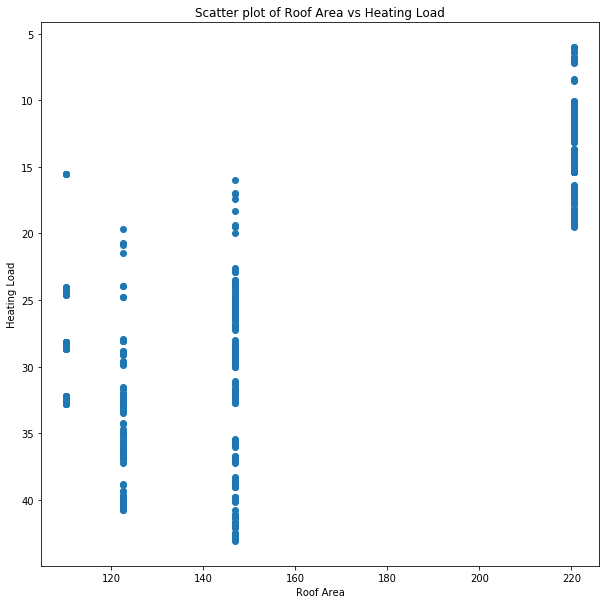

In [48]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Roof Area'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Roof Area vs Heating Load') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

Text(0, 0.5, 'Heating Load')

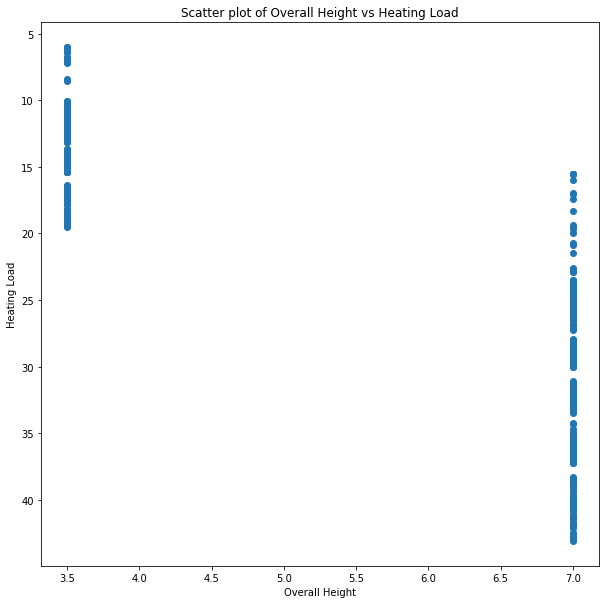

In [49]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Overall Height'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Overall Height vs Heating Load') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

Text(0, 0.5, 'Heating Load')

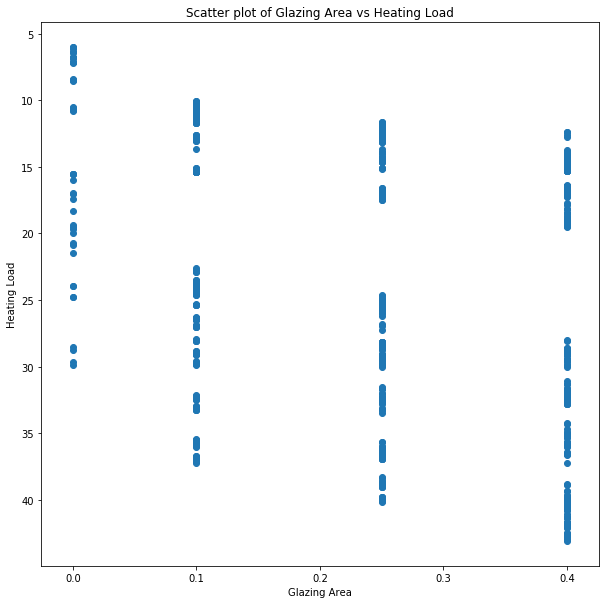

In [50]:
## Define a figure and axes and make a scatter plot
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis
ax.invert_yaxis() # put more energy efficient at top
ax.scatter(x = energy_loads['Glazing Area'], y = energy_loads['Heating Load'])
ax.set_title('Scatter plot of Glazing Area vs Heating Load') # Give the plot a main title
ax.set_xlabel('Glazing Area') # Set text for the x axis
ax.set_ylabel('Heating Load') # Set text for y axis

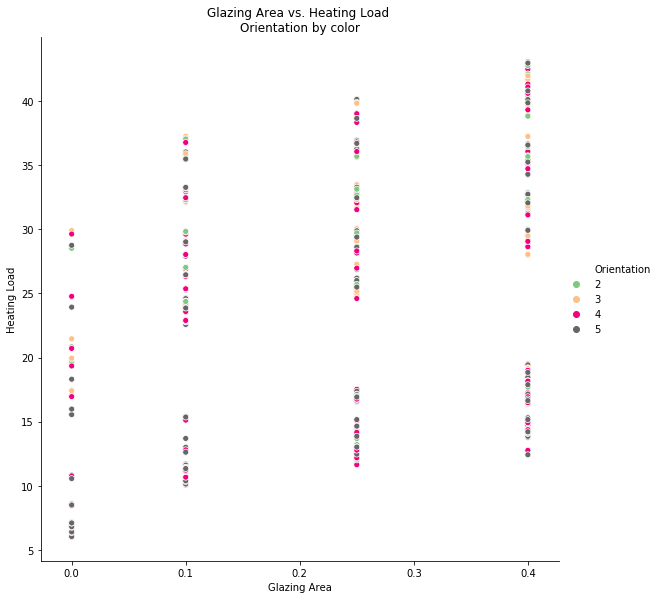

In [51]:
ax = sns.relplot(x = 'Glazing Area', y = 'Heating Load', 
                 hue = 'Orientation', palette = 'Accent',
                 data=energy_loads,
                 height = 8, aspect=1/1)
ax.set(title ='Glazing Area vs. Heating Load \nOrientation by color', # Main title
       xlabel = 'Glazing Area', # Set text for the x axis
       ylabel = 'Heating Load') # Set text for y axis 